Phase 1 About the data

The data can be found in Kaggle. This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. Currently, there are about 1.5 million accident records in this dataset. Check here to learn more about this dataset.

It is important to notice that the dataset does not contain information about Alaska(AK) and Hawaï (HI).

Objective
The purpose of this analysis is to answer the following questions:

Which States and Cities have the most traffic accidents?
What is the time of the day, the day of the week and the month with the higher number of accidents?
How many accidents per year? And what is the trend, increasing or decreasing?
What are the most common weather conditions on the days of the accidents?
How many accidents have a severity level of 1, 2, 3 and 4?


Phase 2 Data Preparation

Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\brullan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import folium
from folium import plugins
from folium.plugins import HeatMap

Loading the dataset with Pandas

In [8]:
# Reading the dataset
accidents = pd.read_csv("C:\\Users\\brullan\\Downloads\\US_Accidents_Dec21_updated.csv\\US_Accidents_Dec21_updated.csv")

Exploring the dataset

In [9]:
accidents

ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.112060  -83.031870         3.230   
1        39.865420  -84.062800  39.865010  -84.048730         0.747   
2        39.102660  -84.524680  39.102090  -84.523960         0.055   
3        41.062130  -81.537840  41.062170  -81.535470         0.123   
4        39.172393  -84.492792  39.170476  -84.501798         0.500   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                          At Dart Ave/Exit 21 - Accident.  ...       False   
4                       At Mitchell Ave/Exit 6 - Accident.  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
... 

Column names and types

In [10]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Statistical description of each column

In [11]:
accidents.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

Number of numeric columns

In [12]:
# int, float and boolean data
print(accidents.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(accidents.count(numeric_only=True)))

Severity             2845342
Start_Lat            2845342
Start_Lng            2845342
End_Lat              2845342
End_Lng              2845342
Distance(mi)         2845342
Number               1101431
Temperature(F)       2776068
Wind_Chill(F)        2375699
Humidity(%)          2772250
Pressure(in)         2786142
Visibility(mi)       2774796
Wind_Speed(mph)      2687398
Precipitation(in)    2295884
Amenity              2845342
Bump                 2845342
Crossing             2845342
Give_Way             2845342
Junction             2845342
No_Exit              2845342
Railway              2845342
Roundabout           2845342
Station              2845342
Stop                 2845342
Traffic_Calming      2845342
Traffic_Signal       2845342
Turning_Loop         2845342
dtype: int64
Total No. of Numerical Columns: 27


Phase 3 Process
Checking missing data and Percentage of missing data for each column

#Due to the high number of missing data, the columns 'Number', 'Precipitation', 'Wind_Chill(F)' are not going to be used in this analysis.

In [13]:
missing_percentage = accidents.isna().sum().sort_values(ascending=False) / len(accidents)*100
missing_percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<Axes: >

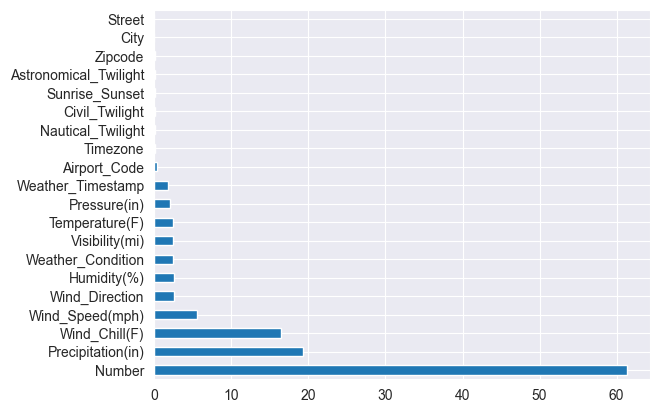

In [14]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

Checking for duplicates

In [15]:
accidents['ID'].duplicated().any()

False

Phase 4 Exploratory Data Analysis

Analysing the number of accidents by location, State and Number of states in the dataset
#The dataset does not contain information about Alaska (AK) and Hawaï (HI).
#Total number of States in the dataset is 49

In [16]:
#Distinct states in the dataset
states = accidents.State.unique()
states

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [17]:
#How many states in the dataset
len(states)

49

States with the most number of accidents

In [18]:
accidents_by_state = accidents.State.value_counts()
accidents_by_state

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

<Axes: title={'center': 'No. of Accidents by State'}, xlabel='State', ylabel='count'>

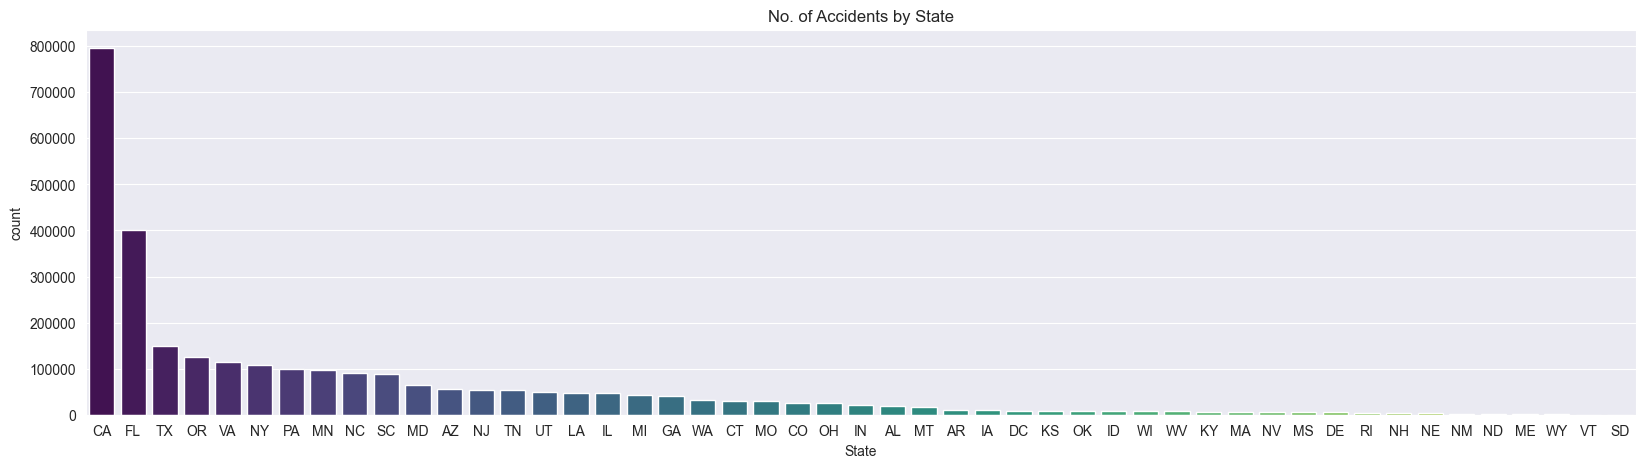

In [19]:
fig, ax = plt.subplots(figsize = (20,5))
state_plot = sns.countplot(x=accidents.State, data=accidents, order=accidents.State.value_counts().iloc[:49].index, orient = 'v', palette = "viridis")
state_plot.set_title("No. of Accidents by State")
state_plot

In the information provided by this chart we can see that California(CA) is the most populated state, followed by Texas(TX) and Florida(FL), they are also in the top 5 of the states with the higher number of accidents.
Oregon (OR) is the 3rd state with the most number of accidents and the 27th most populated state in the US.

Number of cities in the dataset

In [20]:
cities = accidents.City.unique()
len(cities)

11682

The dataset has 10658 distinct cities

Accidents per city

In [22]:
accidents_by_city = accidents.City.value_counts()
accidents_by_city

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

Top 20 cities with the most number of accidents

In [23]:
#top 20 cities with the most number of accidents
accidents_by_city[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<Axes: title={'center': 'No. of Accidents by City - Top 50 cities'}, xlabel='City', ylabel='count'>

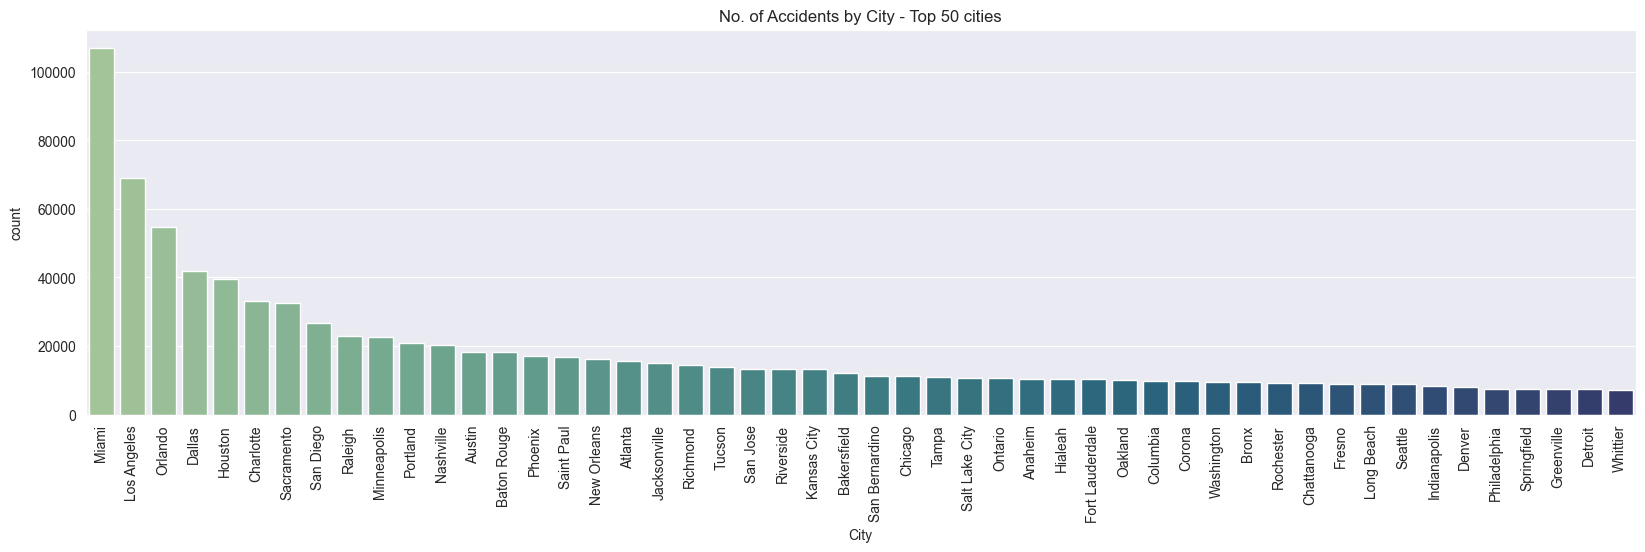

In [24]:
fig, ax = plt.subplots(figsize = (20,5))
city_plot = sns.countplot(x=accidents.City, data=accidents, order=accidents.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest")
city_plot.set_title("No. of Accidents by City - Top 50 cities")
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
city_plot

Percentage of cities with more and less than 1000 accidents

In [25]:
# Calculating the number of cities with more and less than 1000 accidents
high_accident_city = accidents_by_city[accidents_by_city >=1000]
low_accident_city = accidents_by_city[accidents_by_city <1000]

In [26]:
# Percentage of Cities with more than 1000 accidents
len(high_accident_city) / len(cities)*100

4.245848313644924

In [27]:
# Percentage of Cities with more than 1000 accidents
len(low_accident_city) / len(cities)*100

95.74559150830338

Only 4.24% of the cities have more than 1000 accidents

Distribution on a map: Creating a dataset sample of 10%

In [28]:
sample_accidents = accidents.sample(int(0.1 * len(accidents)))

In [29]:
map = folium.Map(location = [40, -102], zoom_start = 4)
folium.plugins.HeatMap(zip(list(sample_accidents.Start_Lat), list(sample_accidents.Start_Lng)), scale_radius = False, radius = 12).add_to(map)
map

In the information retrieved from this heatmap we can conclude that there is a lower number of accidents in the central regions pf the US, that happen to be the less populated ones. Both coasts have a higher number of accidents.

Analysing the Timestamp of the accidents

Checking the Start_Time column

In [30]:
accidents.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

Converting Start_Time column to a 'datetime' format

In [31]:
accidents.Start_Time = pd.to_datetime(accidents.Start_Time)
accidents.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

Number of accidents per hour of the day

<Axes: title={'center': 'No. of Accidents by Hour'}, xlabel='Start_Time', ylabel='count'>

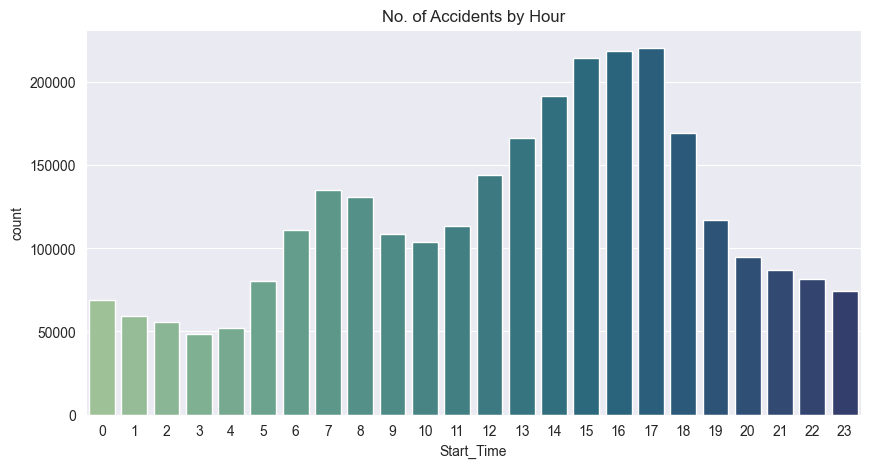

In [32]:
fig, ax = plt.subplots(figsize = (10,5))
hour_plot = sns.countplot(x=accidents.Start_Time.dt.hour, data=accidents, orient = 'v', palette = "crest")
hour_plot.set_title("No. of Accidents by Hour")
hour_plot

Number of accidents by day of the week

<Axes: title={'center': 'No. of Accidents by day of the week'}, xlabel='Start_Time', ylabel='count'>

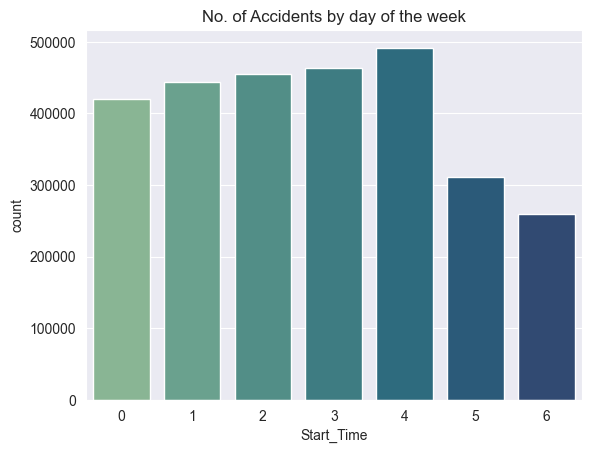

In [33]:
dayofweek_plot = sns.countplot(x=accidents.Start_Time.dt.dayofweek, data=accidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents by day of the week")
dayofweek_plot

We can see that Sunday is the day of the week with the lower number of accidents

Number of accidents per hour on Sundays

<Axes: title={'center': 'No. of Accidents per hour on Sundays'}, xlabel='Start_Time', ylabel='count'>

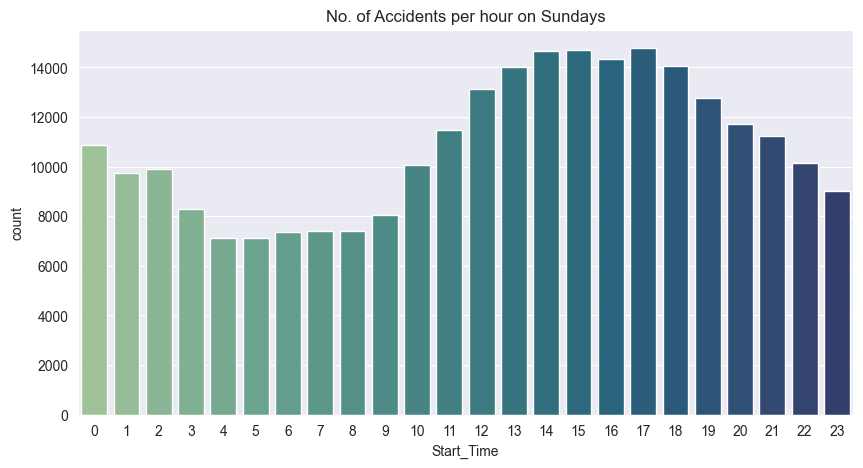

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
sundays_star_time= accidents.Start_Time[accidents.Start_Time.dt.dayofweek == 6]
dayofweek_plot = sns.countplot(x=sundays_star_time.dt.hour, data=accidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents per hour on Sundays")
dayofweek_plot

Number of accidents by Month

<Axes: title={'center': 'No. of Accidents by Month'}, xlabel='Start_Time', ylabel='count'>

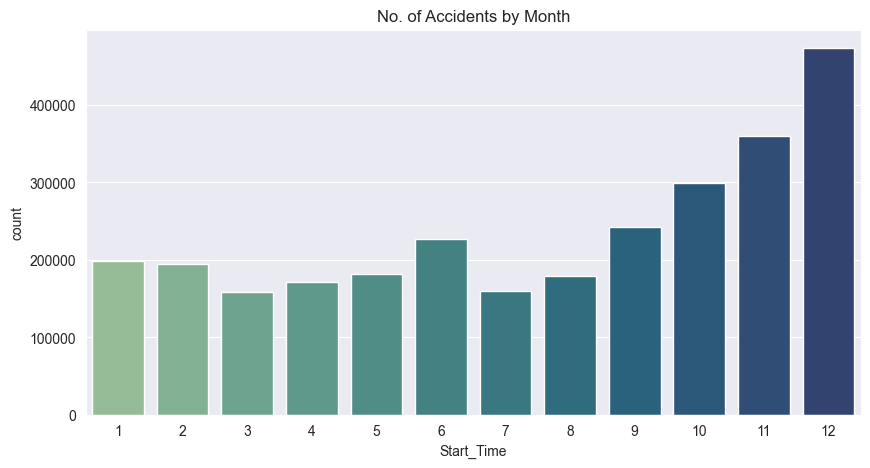

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
month_plot = sns.countplot(x=accidents.Start_Time.dt.month, data=accidents, orient = 'v', palette = "crest")
month_plot.set_title("No. of Accidents by Month")
month_plot

Number of accidents by Year

<Axes: title={'center': 'No. of Accidents by Year'}, xlabel='Start_Time', ylabel='count'>

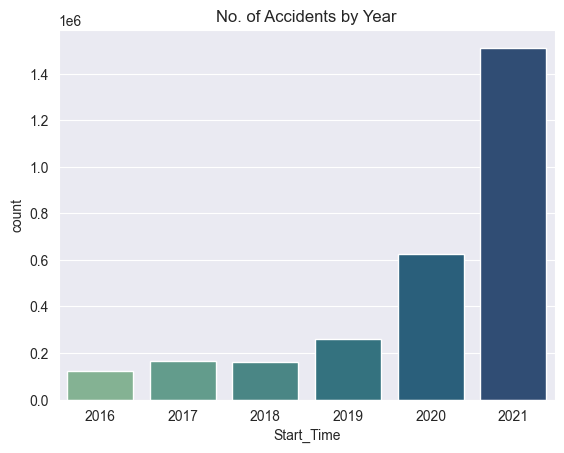

In [36]:
# Number of accidents by year
year_plot = sns.countplot(x=accidents.Start_Time.dt.year, data=accidents, orient = 'v', palette = "crest")
year_plot.set_title("No. of Accidents by Year")
year_plot

Analyzing the Weather impact on accidents

In [37]:
#Top 50 weather conditions with the most accidents
weather = accidents.Weather_Condition.value_counts()
weather[:50]

Fair                            1107194
Mostly Cloudy                    363959
Cloudy                           348767
Partly Cloudy                    249939
Clear                            173823
Light Rain                       128403
Overcast                          84882
Scattered Clouds                  45132
Light Snow                        43752
Fog                               41226
Haze                              36354
Rain                              31044
Fair / Windy                      15195
Heavy Rain                        11824
Smoke                              7200
Light Drizzle                      7041
Thunder in the Vicinity            6944
Cloudy / Windy                     6839
T-Storm                            6546
Mostly Cloudy / Windy              6297
Thunder                            6018
Snow                               5289
Light Rain with Thunder            5287
Partly Cloudy / Windy              3876
Wintry Mix                         3843


<Axes: title={'center': 'No. of Accidents by Weather Condition'}, xlabel='Weather_Condition', ylabel='count'>

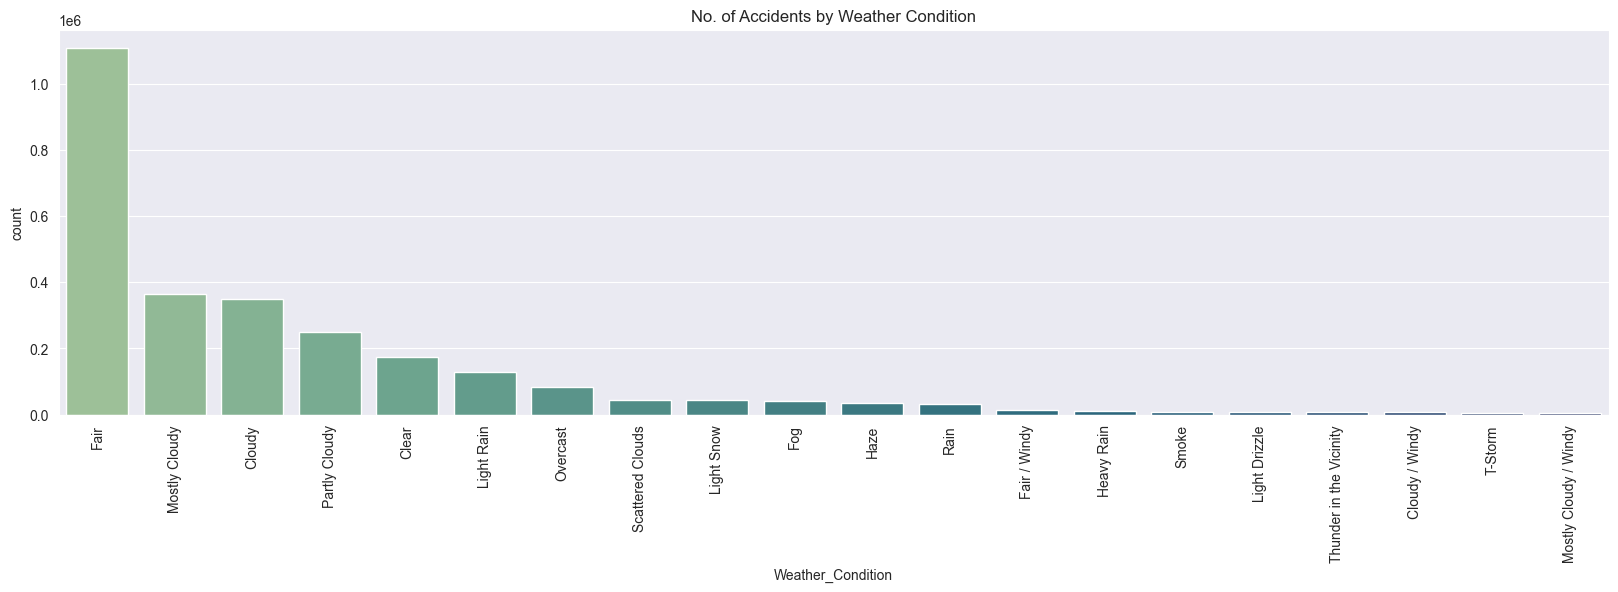

In [38]:
fig, ax = plt.subplots(figsize = (20,5))
wc_plot = sns.countplot(x=accidents.Weather_Condition, data=accidents,order=accidents.Weather_Condition.value_counts().iloc[:20].index, orient = 'v', palette = "crest")
wc_plot.set_title("No. of Accidents by Weather Condition")
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=90)
wc_plot

Most common temperatures on the days of accidents

In [40]:
temperature = accidents['Temperature(F)'].value_counts()
temperature[:20]

73.0    64505
77.0    63575
75.0    60534
72.0    59681
68.0    58557
        ...  
53.6     3079
30.9     3027
57.2     3013
80.6     2965
20.0     2946
Name: Temperature(F), Length: 119, dtype: int64

<Axes: title={'center': 'No. of Accidents by Temperature'}, xlabel='Temperature(F)', ylabel='count'>

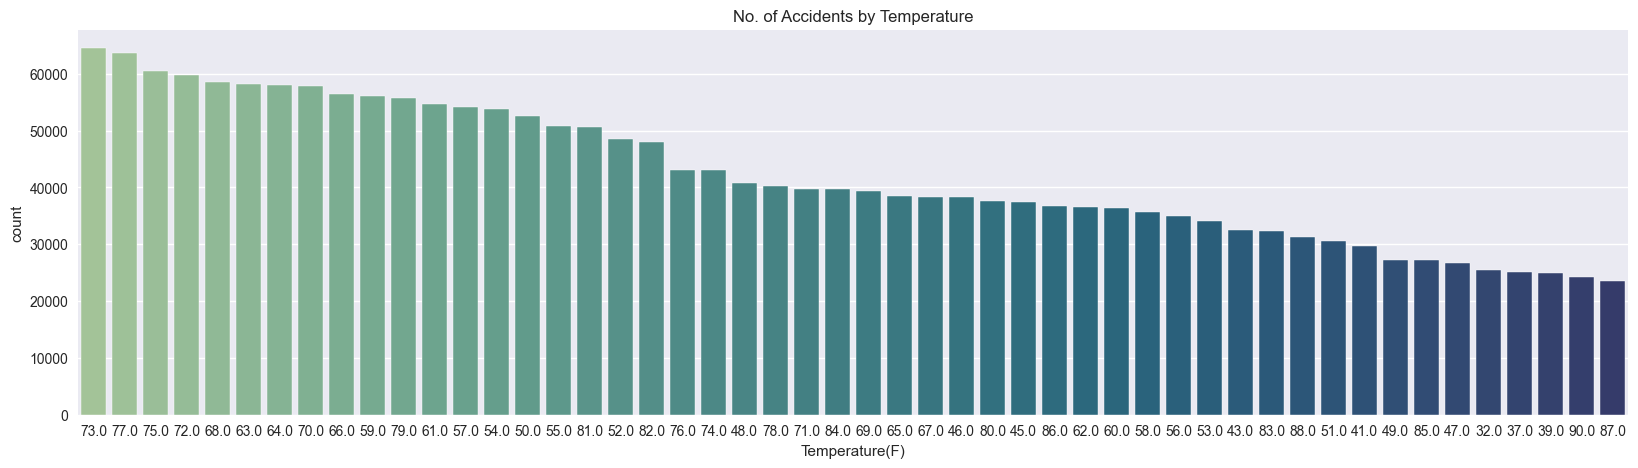

In [41]:
fig, ax = plt.subplots(figsize = (20,5))
temp_plot = sns.countplot(x=accidents['Temperature(F)'], data=accidents,order=accidents['Temperature(F)'].value_counts().iloc[:50].index, orient = 'v', palette = "crest")
temp_plot.set_title("No. of Accidents by Temperature")
temp_plot.set_xticklabels(temp_plot.get_xticklabels())
temp_plot

Analyzing the level of severity of the accidents

Shows the severity of the accident, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [42]:
severity = accidents.Severity.value_counts()/ len(accidents.Severity)*100
severity

2    89.022374
3     5.451190
4     4.610799
1     0.915637
Name: Severity, dtype: float64

array([<Axes: ylabel='Severity'>], dtype=object)

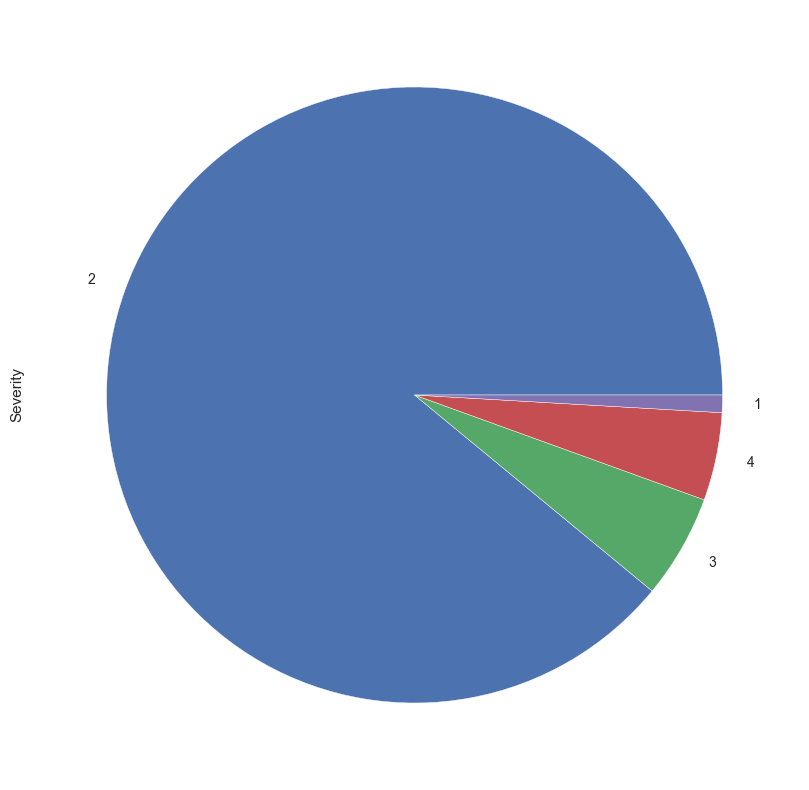

In [43]:
severity.plot.pie(subplots=True,  figsize=(20, 10))

Phase 5 Findings

About the location:

- The dataset does not contain information about Alaska (AK) and Hawaï (HI).
- California(CA) is the most populated state, followed by Texas(TX) and Florida(FL), they are also in the top 5 of the states with the higher number of accidents.
- Oregon (OR) is the 4th state with the most number of accidents and the 27th most populated state in the US.
- Only 4.24 % of the cities have more than 1000 accidents
- 1167 cities reported just 1 accident ( Need to investigate further)
- The number of accidents per city decreases exponentially

About the Timestamp

- In the mornings, accidents start to increase at 5 am and reach a higher point at 8 am.
- In the afternoon accidents start to increase at 13pm and reaches the higher point at 17pm
- On weekends the distribution of accidents per hour is different than on weekdays. It increases at 12am and start to decrease at 1am
- The number of accidents is higher in October, November and December. December is the mont with the most number of accidents.
- It's important to noticed that the dataset starts in February 2016. The month of January 2016 is missing in this dataset.
- 2021 has a significantly higher number of accidents. This is an issue that needs further investigation.


About the Weather

- Most accidents happen on the days with a Fairweather, follow by days Mostly Cloudy.
- Most accidents happen on days with temperatures between 50°F and 75°F (10°C and 23°C)


About the Severity

- Most accidents have a severity level of 2, 89.02% which means a lower impact on traffic. 
- Level 4, high impact on traffic, comes on third place with 4.61%.